# SOAR : 
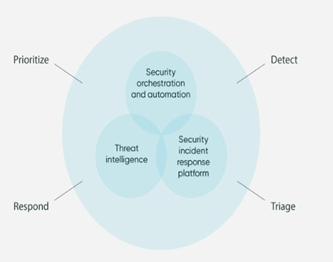

SOAR (**Security Orchestration , Automation and Response**) is a stack of compatible software programs that enables an organization to collect data about security threats and respond to security events without human assistance.

In [56]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
figCount=1

# Reading the SOR data
### We are reading the SOR data in a data frame so that we can perform the analysis and find out the SOAR

In [57]:
data=pd.read_csv(r"./System_of_Record_SOR_Labelled.csv")
data.head()

,Date,Type,TransactionAmount,IpSource,AddressSource,BalanceSource,IpDestination,AddressDestination,BalanceDestination,Fraud
0,2021-12-23,Account Creation,NaN,112.203.228.24,aleo1ekualfc4ksmx6r23xfwsey7de8m3ukceqxmeg6uca...,NaN,NaN,NaN,NaN,0
1,2021-12-23,Account Creation,NaN,189.48.136.104,aleo1q865tp9vryfrcytzfgxdzy32wy04m6hq374xfxr7d...,NaN,NaN,NaN,NaN,0
2,2021-12-23,Account Creation,NaN,238.113.30.249,aleo1x6umtzdzjssx8t89xhpj2cev35cv93s4h2ms9608l...,NaN,NaN,NaN,NaN,0
3,2021-12-23,Account Creation,NaN,222.192.120.242,aleo1022vme7y4d55fznml40wq8l7r8ghc5q8593dg4r3c...,NaN,NaN,NaN,NaN,0
4,2021-12-23,Account Creation,NaN,51.172.116.204,aleo1awxrtukerqph56ejlsv4lmvr4dwz7fyz2xnmk80h7...,NaN,NaN,NaN,NaN,0


# Finding Total accounts 
### The first part of SOAR analysis is to find how many accounts are there in the data that we have been given

In [58]:
totalUniqueUser=data["AddressSource"].nunique()
totalUniqueUser

50

# Analysis of Average Transaction Amount Per Account
### The second analysis that we are doing is we are finding how much is the average amount a user transacts which can be used for finding anomalous transactions and converting it into a bar graph

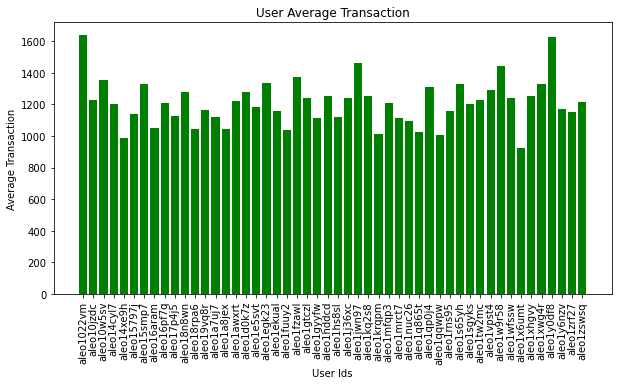

In [59]:
AvgTxnPerUser=data.groupby(["AddressSource"])["TransactionAmount"].mean().reset_index()
user,avgTrxn=[],[]
for idx in AvgTxnPerUser.index:
    user.append(AvgTxnPerUser.loc[idx,"AddressSource"][:10])
    avgTrxn.append(AvgTxnPerUser.loc[idx,"TransactionAmount"])

plt.figure(figsize=(10,5))
plt.bar(user,avgTrxn,color="Green")
plt.xticks(rotation = 90)

plt.xlabel("User Ids")
plt.ylabel("Average Transaction")
plt.title("User Average Transaction")
plt.savefig("../Dashboard/Images/SecureShield_%s.png"%(figCount))
figCount+=1
plt.show()

# Operations Type Analysis
### We are making a pie chart that shows every transaction type as a percentage of total transactions that have occured

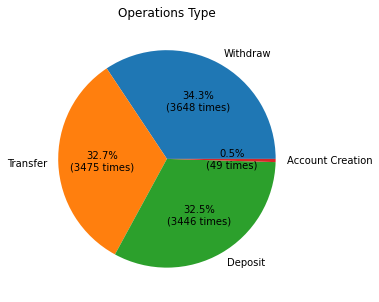

In [60]:
metrics=dict(data[["Type"]].value_counts())
keys=[key[0] for key in metrics.keys()]
values=list(metrics.values())

# Creating plot
fig = plt.figure(figsize =(8, 5))
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} times)".format(pct, absolute)

plt.pie(values, autopct = lambda pct: func(pct, values),labels = keys)
plt.title("Operations Type")

# show plot
plt.savefig("../Dashboard/Images/SecureShield_%s.png"%(figCount))
figCount+=1
plt.show()

# Unique IP Count per Day Analysis
### We are finding how many unique IP's had made transactions in a single day. This is helpful for finding any DOS Attack

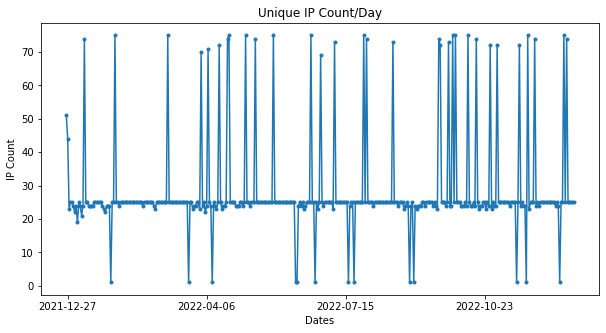

In [32]:
data_dropped=data.drop(["Type","TransactionAmount","AddressSource","BalanceSource","IpDestination","AddressDestination","BalanceDestination","Fraud"],axis=1)
count_unique_IPs=data_dropped.groupby(["Date"]).nunique().sort_values(by="Date").reset_index()
dates,ipCount=count_unique_IPs["Date"],count_unique_IPs["IpSource"]

plt.figure(figsize=(10,5))
plt.plot(dates, ipCount,".-")
plt.xticks(np.arange(1, len(dates) + 1, 100))
plt.xlabel("Dates")
plt.ylabel("IP Count")
plt.title("Unique IP Count/Day")
plt.savefig("../Dashboard/Images/SecureShield_%s.png"%(figCount))
figCount+=1
plt.show()

# Unique IP's Per Account Over Time
### We are finding over time a user does transactions from how many unique IP's. This can be used to alert the user in case of new transaction occours from a new IP 

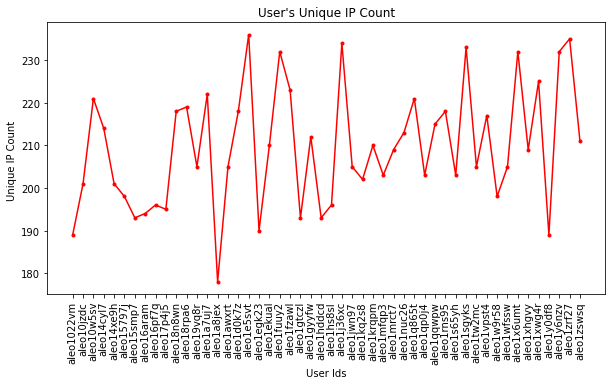

In [33]:
data_dropped=data.drop(["Type","TransactionAmount","Date","BalanceSource","IpDestination","AddressDestination","BalanceDestination","Fraud"],axis=1)
count_unique_IPs_Account=data_dropped.groupby(["AddressSource"]).nunique().reset_index()
accounts,ipCount=[x[:10] for x in count_unique_IPs_Account["AddressSource"]],count_unique_IPs_Account["IpSource"]

plt.figure(figsize=(10,5))

plt.plot(accounts, ipCount,'.-',color="Red")
plt.xticks(rotation = 90)
plt.xlabel("User Ids")
plt.ylabel("Unique IP Count ")
plt.title("User's Unique IP Count")

plt.savefig("../Dashboard/Images/SecureShield_%s.png"%(figCount))
figCount+=1
plt.show()

# Magic Quardrent data Analysis
### Converting Date column into Ordinal Values

In [34]:
data['Date'] = pd.to_datetime(data['Date'])
for idx in data.index:
    data.at[idx,'Date'] = data.loc[idx,'Date'].toordinal()
data.head()

,Date,Type,TransactionAmount,IpSource,AddressSource,BalanceSource,IpDestination,AddressDestination,BalanceDestination,Fraud
0,738147,Account Creation,NaN,112.203.228.24,aleo1ekualfc4ksmx6r23xfwsey7de8m3ukceqxmeg6uca...,NaN,NaN,NaN,NaN,0
1,738147,Account Creation,NaN,189.48.136.104,aleo1q865tp9vryfrcytzfgxdzy32wy04m6hq374xfxr7d...,NaN,NaN,NaN,NaN,0
2,738147,Account Creation,NaN,238.113.30.249,aleo1x6umtzdzjssx8t89xhpj2cev35cv93s4h2ms9608l...,NaN,NaN,NaN,NaN,0
3,738147,Account Creation,NaN,222.192.120.242,aleo1022vme7y4d55fznml40wq8l7r8ghc5q8593dg4r3c...,NaN,NaN,NaN,NaN,0
4,738147,Account Creation,NaN,51.172.116.204,aleo1awxrtukerqph56ejlsv4lmvr4dwz7fyz2xnmk80h7...,NaN,NaN,NaN,NaN,0


# Most Active and Idle Days
### First part of quardrent is Most active Days 
### Second part of quardrent is Most Idle Days

In [35]:
grouped_date=data.groupby(["Date"])
sorted_date_frq=grouped_date[["Type"]].count().sort_values(by='Type').reset_index()
n=len(sorted_date_frq)

idle_days,idle_days_freq=[],[]
active_days,active_days_freq=[],[]
for i in range(20):
    idle_days.append(sorted_date_frq.loc[i,"Date"])
    idle_days_freq.append(sorted_date_frq.loc[i,"Type"])

    active_days.append(sorted_date_frq.loc[n-i-1,"Date"])
    active_days_freq.append(sorted_date_frq.loc[n-i-1,"Type"])

# print(active_days,active_days_freq)
# print(idle_days,idle_days_freq)

# DDOS(Data Denial of Service Attacks) Days & IP's
### Third part is Days having most number of DDOS Attacks

In [36]:
grouped_date_ip=data.groupby(["Date","IpSource"])
sorted_grouped_ddos=grouped_date_ip[["Type"]].count().sort_values(by='Type',ascending=False).reset_index()
ddos_days_ip=sorted_grouped_ddos[sorted_grouped_ddos["Type"]>15][:5]

ddos_days,ddos_days_attacks_freq=[],[]
for i in range(5):
    ddos_days.append(ddos_days_ip.loc[i,"Date"])
    ddos_days_attacks_freq.append(ddos_days_ip.loc[i,"Type"])
# ddos_days,ddos_days_attacks_freq

# Fraud Days
### Fourth part of quardrent is days having most number of Frauds

In [37]:
fraud_days_sorted=grouped_date["Fraud"].sum().reset_index().sort_values(by="Fraud",ascending=False)[:5]
fraud_days_sorted.reset_index(drop=True,inplace=True)

In [38]:
fraud_days,fraud_days_freq=[],[]
for i in range(5):
    fraud_days.append(fraud_days_sorted.loc[i,"Date"])
    fraud_days_freq.append(fraud_days_sorted.loc[i,"Fraud"])

# fraud_days,fraud_days_freq

In [39]:
from datetime import datetime
def convertOrdinalDate(ordVals):
    dates=[]
    for ord in ordVals:
        dates.append(datetime.fromordinal(ord).strftime("%d-%m-%Y"))
    return dates

# Magic Quardrent Visualization

<Figure size 1080x720 with 0 Axes>

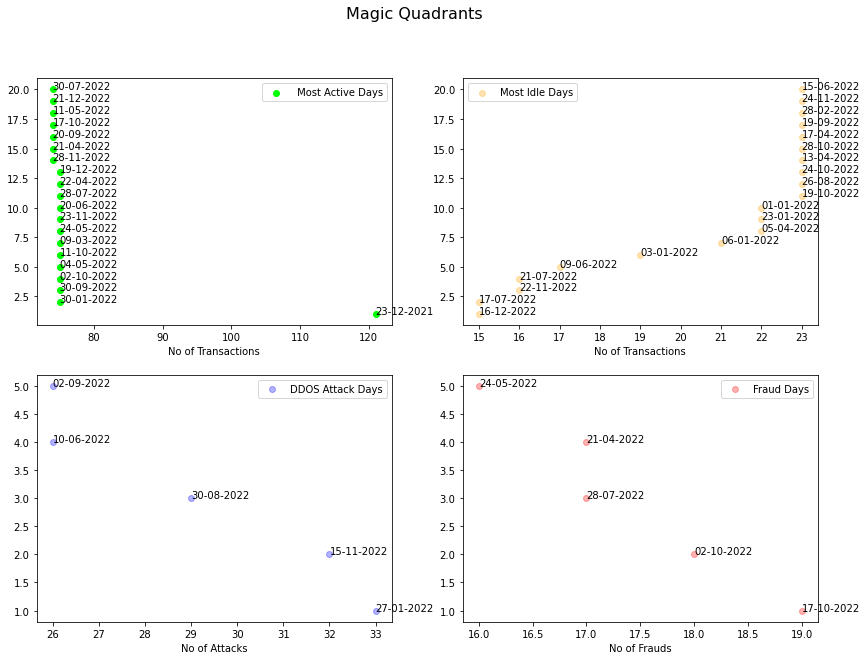

In [40]:
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(15,10))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(14, 10))
# plt.subplots_adjust(wspace=, hspace=0)

ax1.scatter(active_days_freq, range(1,len(active_days)+1), color = "lime", label = "Active Days")
active_days_dates=convertOrdinalDate(active_days)
for i in range(len(active_days)):
    ax1.annotate(active_days_dates[i], (active_days_freq[i],i+1))
ax1.set_xlabel("No of Transactions")
ax1.legend([" Most Active Days"])

ax2.scatter(idle_days_freq, range(1,len(idle_days)+1), color = "orange", label = "Idle Days", alpha = 0.3)
idle_days_dates=convertOrdinalDate(idle_days)
for i in range(len(idle_days)):
    ax2.annotate(idle_days_dates[i], (idle_days_freq[i], i+1))
ax2.set_xlabel("No of Transactions")
ax2.legend(["Most Idle Days"])


ax3.scatter(ddos_days_attacks_freq, range(1,len(ddos_days)+1), color = "Blue", label = "DDOS Days", alpha = 0.3)
ddos_days_dates=convertOrdinalDate(ddos_days)
for i in range(len(ddos_days)):
    ax3.annotate(ddos_days_dates[i], (ddos_days_attacks_freq[i], i+1))
ax3.set_xlabel("No of Attacks")
ax3.legend(["DDOS Attack Days"])

ax4.scatter(fraud_days_freq, range(1,len(fraud_days)+1), color = "Red", label = "Fraud Days", alpha = 0.3)
fraud_days_dates=convertOrdinalDate(fraud_days)
for i in range(len(fraud_days)):
    ax4.annotate(fraud_days_dates[i], (fraud_days_freq[i], i+1))
ax4.set_xlabel("No of Frauds")
ax4.legend(["Most fraudulent Days"])

fig.suptitle("Magic Quadrants" , fontsize=16)
plt.legend()
plt.savefig("../Dashboard/Images/SecureShield_%s.png"%(figCount))
figCount+=1
plt.show()
